# Electronic

In [69]:
# Imports
import requests
import os
import json
from dotenv import load_dotenv

import pandas as pd
import numpy as np
import matplotlib as plt

In [70]:
# Load .env environment variables
load_dotenv()

# Set RAPID API key
my_rapid_api_key = os.getenv("RAPID_API_KEY")

In [71]:
# Define function to use Shazam Core API

def get_chart_genre(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/charts/genre-world"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [72]:
# Define function to use Shazam Core API

def get_lyrics(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/tracks/details"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [73]:
# Use 'Track details' endpoint to retrieve lyrics for a single track

genre = 'ELECTRONIC'
limit_songs = 50
country = 'US'

querystring = {"country_code":country,"genre_code":genre,"limit":limit_songs}
chart_response = get_chart_genre(querystring)

In [74]:
# Retrieve Track IDs

track_ids=[] # song identifier
titles = [] # song name
subtitles = [] # Main artist and featured artists

for track in range(len(chart_response)):
    track_ids.append(chart_response[track]['id'])
    titles.append(chart_response[track]['title'])
    subtitles.append(chart_response[track]['subtitle'])

print(f"The number of songs retrieved is : {len(track_ids)}")

chart_songs = pd.DataFrame({"Track Name": titles, "Artists": subtitles, 'TrackIDs': track_ids}).set_index('TrackIDs')
chart_songs.head(5)

The number of songs retrieved is : 50


,Track Name,Artists
TrackIDs,,
385133121,Love Tonight,Shouse
588664699,Lipstick,Kungs
455370962,Lost In The Fire,Gesaffelstein & The Weeknd
582570870,Hurricane,Ofenbach & Ella Henderson
568196935,Never Going Home,Kungs


<AxesSubplot:title={'center':'Electronic Top Charts'}, xlabel='Artists'>

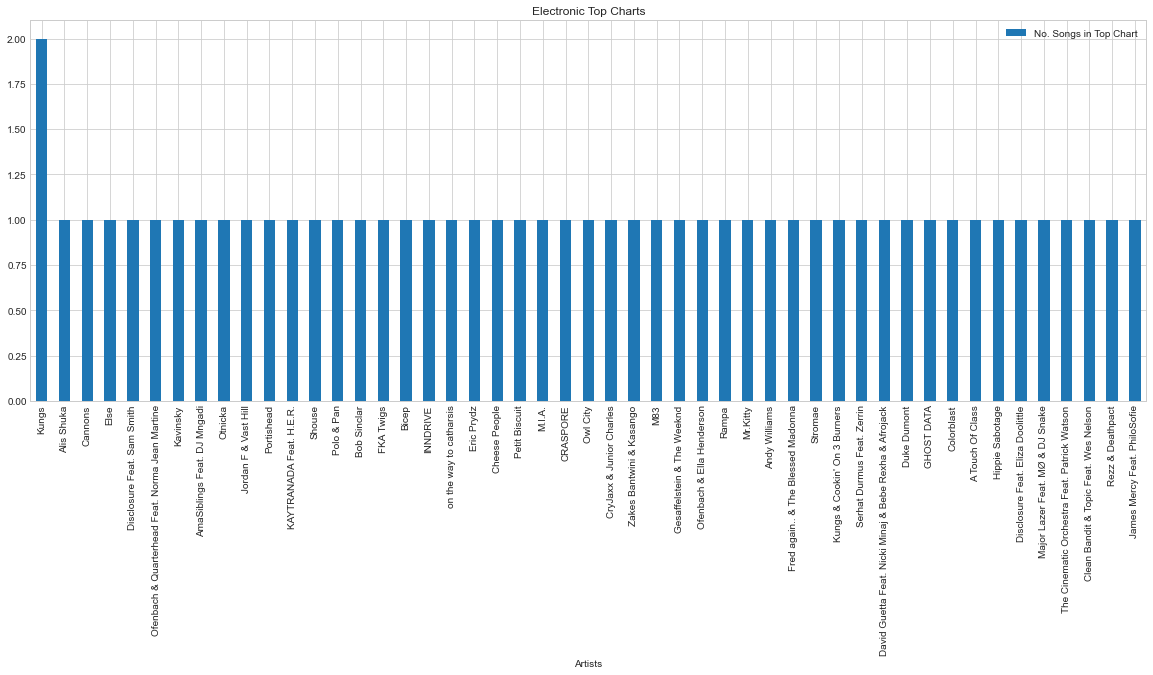

In [75]:
# Look at the data

from collections import Counter

artists_list = list(chart_songs.Artists)
artist_counts = {artist: artists_list.count(artist) for artist in artists_list} #dict with frequency of artist in top chart

artists_df = pd.DataFrame(list(artist_counts.items()),columns = ['Artists','No. Songs in Top Chart']).set_index('Artists')
artists_df.sort_values(by = 'No. Songs in Top Chart', ascending=False, inplace=True) #sort values

artists_df.plot.bar(figsize =(20, 7), title = 'Electronic Top Charts')

In [76]:
# Retrieve Lyrics for all TrackIDs

track_ids  # the list created in "Search for top songs in Genre" section is required

lyrics=[]

for trackID in track_ids:
    querystring = {"track_id":trackID}
    track_details_response = get_lyrics(querystring)

    if track_details_response['sections'][1]['type'] != "LYRICS":  # Note: tracks with a type != "LYRICS" don't contain lyrics
        lyrics.append([''])
    else:
        track_lyrics = track_details_response['sections'][1]['text']
        lyrics.append(track_lyrics)

In [77]:
# Add lyrics column to dataframe with chart songs

all_lyrics = pd.Series(" ".join(map(str,song)) for song in lyrics) #each song is stored as a list, this turns each list into a string
all_lyrics_df = pd.DataFrame({"Lyrics": all_lyrics, "Track IDs": track_ids}).set_index('Track IDs')

lyrics_df = pd.concat([chart_songs, all_lyrics_df], axis=1)
lyrics_df.head(5)

,Track Name,Artists,Lyrics
385133121,Love Tonight,Shouse,"Oh Oh oh Oh-oh Oh, oh-oh When you're tired, w..."
588664699,Lipstick,Kungs,"Open the door, just take me down, I wanna step..."
455370962,Lost In The Fire,Gesaffelstein & The Weeknd,I wanna fuck you slow with the lights on (Ligh...
582570870,Hurricane,Ofenbach & Ella Henderson,"Mm, hmm I want you to hold on, I want you to ..."
568196935,Never Going Home,Kungs,Music (we can do it) We're only human (I can f...


In [78]:
lyrics_df

,Track Name,Artists,Lyrics
385133121,Love Tonight,Shouse,"Oh Oh oh Oh-oh Oh, oh-oh When you're tired, w..."
588664699,Lipstick,Kungs,"Open the door, just take me down, I wanna step..."
455370962,Lost In The Fire,Gesaffelstein & The Weeknd,I wanna fuck you slow with the lights on (Ligh...
582570870,Hurricane,Ofenbach & Ella Henderson,"Mm, hmm I want you to hold on, I want you to ..."
568196935,Never Going Home,Kungs,Music (we can do it) We're only human (I can f...
328801000,Necessity,Rampa,
140516014,After Dark,Mr.Kitty,"I see you, you see me How pleasant, this feeli..."
11198507,It's The Most Wonderful Time Of The Year,Andy Williams,It's the most wonderful time of the year With ...
557351619,Marea (We’ve Lost Dancing),Fred again.. & The Blessed Madonna,We've lost dancing (lost dancing) This year we...
50881429,Alors On Danse,Stromae,


In [79]:
lyrics_df.describe()

,Track Name,Artists,Lyrics
count,50,50,50
unique,50,49,34
top,Love Tonight,Kungs,
freq,1,2,17


In [80]:
#Remove empty lyrics
new_lyrics_df = lyrics_df.drop(
    [
        '328801000', 
        '50881429', 
        '342776723', 
        '589730835', 
        '357666338', 
        '310159790', 
        '275383992', 
        '239365741', 
        '573573036' 
        
    ]
)
new_lyrics_df

,Track Name,Artists,Lyrics
385133121,Love Tonight,Shouse,"Oh Oh oh Oh-oh Oh, oh-oh When you're tired, w..."
588664699,Lipstick,Kungs,"Open the door, just take me down, I wanna step..."
455370962,Lost In The Fire,Gesaffelstein & The Weeknd,I wanna fuck you slow with the lights on (Ligh...
582570870,Hurricane,Ofenbach & Ella Henderson,"Mm, hmm I want you to hold on, I want you to ..."
568196935,Never Going Home,Kungs,Music (we can do it) We're only human (I can f...
140516014,After Dark,Mr.Kitty,"I see you, you see me How pleasant, this feeli..."
11198507,It's The Most Wonderful Time Of The Year,Andy Williams,It's the most wonderful time of the year With ...
557351619,Marea (We’ve Lost Dancing),Fred again.. & The Blessed Madonna,We've lost dancing (lost dancing) This year we...
317723994,This Girl,Kungs & Cookin' On 3 Burners,Money rains from the sky above But keep the ch...
435739670,Hislerim,Serhat Durmus Feat. Zerrin,Ruhum yeniden doğdu Ama sanki her şey kayboldu...


In [81]:
new_lyrics_df.describe()

,Track Name,Artists,Lyrics
count,41,41,41
unique,41,40,34
top,Love Tonight,Kungs,
freq,1,2,8


# Tokenizer
In this section, I will use NLTK and Python to tokenize the text. This will include:

- Lowercase each word
- Remove Punctuation
- Remove Stopwords

In [82]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk



In [83]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [84]:
def tokenizer(Lyrics):
    """Tokenizes text."""
    # Create a list of the words
    words_tokened = word_tokenize(Lyrics)

    # Convert the words to lowercase
    words_lowered = [word.lower() for word in words_tokened]

    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    words_regexed = [regex.sub('', word) for word in words_lowered]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_add_ons = ['', 'ai', 'nt', 'wan', 'na', 'uh', 'ay', 'ta', 'nigga', 'shit', 'fuck', 'bitch', 'fucked', 'pussy', 'hoe', 'motherfucker', 'bitches']
    stopwords_removed = [word.lower() for word in words_regexed if word not in sw.union(sw_add_ons)]

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in stopwords_removed]

    return tokens

In [85]:
# Create a new tokens column for lyrics
lyrics_tokens = [tokenizer(words) for words in new_lyrics_df['Lyrics']]
new_lyrics_df['Tokens'] = lyrics_tokens
new_lyrics_df.head()

,Track Name,Artists,Lyrics,Tokens
385133121,Love Tonight,Shouse,"Oh Oh oh Oh-oh Oh, oh-oh When you're tired, w...","[oh, oh, oh, ohoh, oh, ohoh, tired, lonely, re..."
588664699,Lipstick,Kungs,"Open the door, just take me down, I wanna step...","[open, door, take, step, dream, lift, ground, ..."
455370962,Lost In The Fire,Gesaffelstein & The Weeknd,I wanna fuck you slow with the lights on (Ligh...,"[slow, light, light, light, light, one, got, s..."
582570870,Hurricane,Ofenbach & Ella Henderson,"Mm, hmm I want you to hold on, I want you to ...","[mm, hmm, want, hold, want, stay, million, wor..."
568196935,Never Going Home,Kungs,Music (we can do it) We're only human (I can f...,"[music, human, feel, music, got, heated, yeah,..."


In [86]:
new_lyrics_df[['Lyrics', 'Tokens']]

,Lyrics,Tokens
385133121,"Oh Oh oh Oh-oh Oh, oh-oh When you're tired, w...","[oh, oh, oh, ohoh, oh, ohoh, tired, lonely, re..."
588664699,"Open the door, just take me down, I wanna step...","[open, door, take, step, dream, lift, ground, ..."
455370962,I wanna fuck you slow with the lights on (Ligh...,"[slow, light, light, light, light, one, got, s..."
582570870,"Mm, hmm I want you to hold on, I want you to ...","[mm, hmm, want, hold, want, stay, million, wor..."
568196935,Music (we can do it) We're only human (I can f...,"[music, human, feel, music, got, heated, yeah,..."
140516014,"I see you, you see me How pleasant, this feeli...","[see, see, pleasant, feeling, moment, hold, mi..."
11198507,It's the most wonderful time of the year With ...,"[wonderful, time, year, kid, jingle, belling, ..."
557351619,We've lost dancing (lost dancing) This year we...,"[lost, dancing, lost, dancing, year, lose, spa..."
317723994,Money rains from the sky above But keep the ch...,"[money, rain, sky, keep, change, cause, got, e..."
435739670,Ruhum yeniden doğdu Ama sanki her şey kayboldu...,"[ruhum, yeniden, dodu, ama, sanki, ey, kaybold..."


# NGrams and Frequency Analysis
In this section there are the ngrams and word frequency for lyrics.

Use NLTK to produce the n-grams for N = 2.

In [87]:
from collections import Counter
from nltk import ngrams

In [88]:
# Generate the Bitcoin N-grams where N=2
lyrics_text = ' '.join(new_lyrics_df["Lyrics"])
lyrics_processed = tokenizer(lyrics_text)
lyrics_ngrams = Counter(ngrams(lyrics_processed, n=2))
print(dict(lyrics_ngrams.most_common(10)))

{('ca', 'lose'): 35, ('lose', 'babe'): 29, ('need', 'love'): 28, ('let', 'go'): 28, ('love', 'tonight'): 25, ('babe', 'ca'): 23, ('lost', 'dancing'): 22, ('hold', 'hold'): 22, ('drive', 'night'): 21, ('hey', 'cmon'): 20}


In [89]:
# Use the token_count function to generate the top 10 words from the lyrics
def token_count(Tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(Tokens).most_common(N)

In [90]:
# Use token_count to get the top 10 words from hip hop rap lyrics
lyrics_top_10 = token_count(lyrics_processed)
lyrics_top_10

[('need', 64),
 ('oh', 60),
 ('like', 56),
 ('love', 55),
 ('let', 53),
 ('hold', 51),
 ('lost', 47),
 ('feel', 45),
 ('take', 44),
 ('know', 43)]

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Electronic Lyrics')

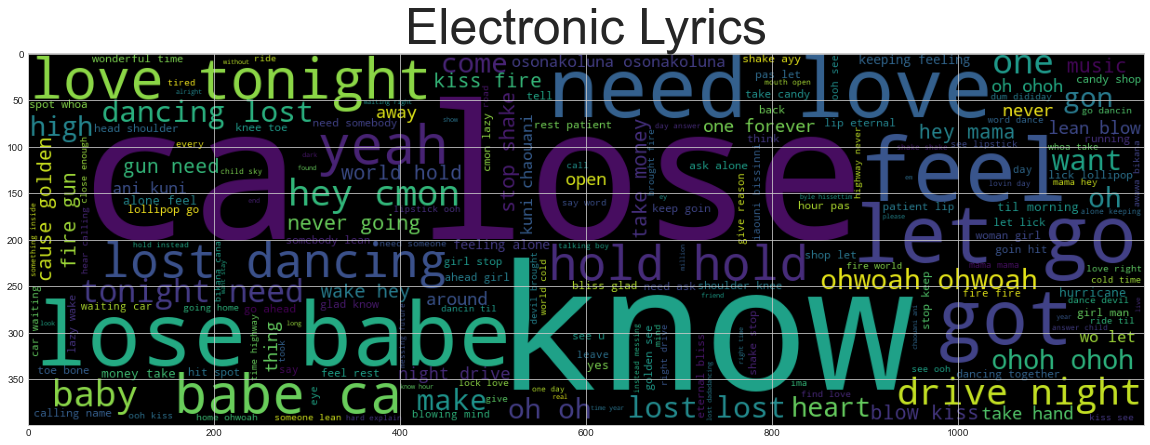

In [92]:
# Generate the Bitcoin word cloud
lyrics_words_joined = ' '.join(lyrics_processed)
wc = WordCloud(width=1200, height=400).generate(lyrics_words_joined)
plt.imshow(wc)
plt.title('Electronic Lyrics', fontdict={'fontsize':50}, loc='Center')